In [54]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


import warnings
warnings.simplefilter("ignore")

In [55]:
#Quarter 1
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2015_Q1.csv')


In [56]:
dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)


In [57]:
#dataset_2016_full=pd.concat([dataset_2016_Q1,dataset_2016_Q2,dataset_2016_Q3,dataset_2016_Q4])
dataset_2016_full=pd.concat([dataset_2016_Q1])

In [58]:
data_2016 = pd.DataFrame(dataset_2016_full.groupby(dataset_2016_full['starttime'].dt.date).count()['trip_id'])
data_2016.columns = ['checkout']

In [59]:
data_2016.shape

(90, 1)

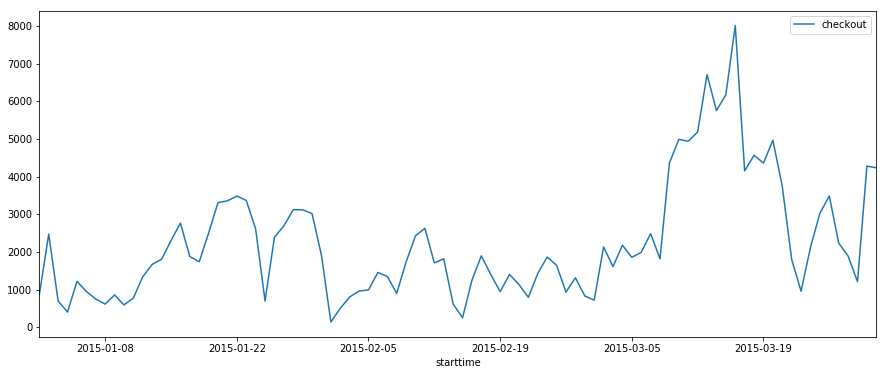

In [60]:
data_2016.plot()
plt.show()

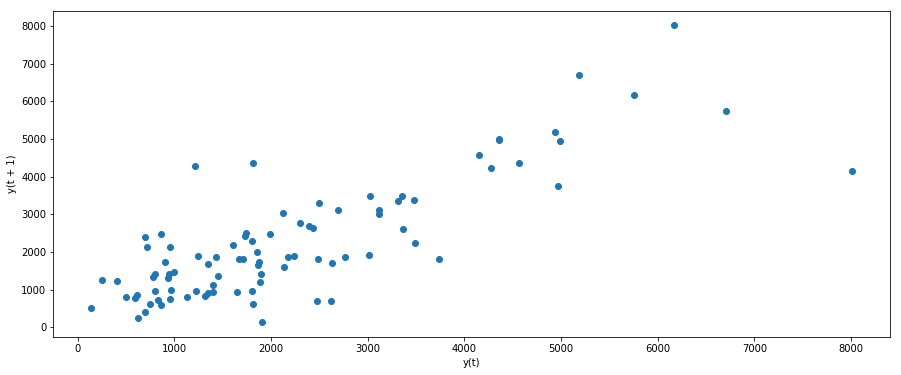

In [61]:
lag_plot(data_2016)
plt.show()

In [62]:

# correlation 
values = pd.DataFrame(data_2016.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.810618
t+1  0.810618  1.000000


# autocorrelation_plot

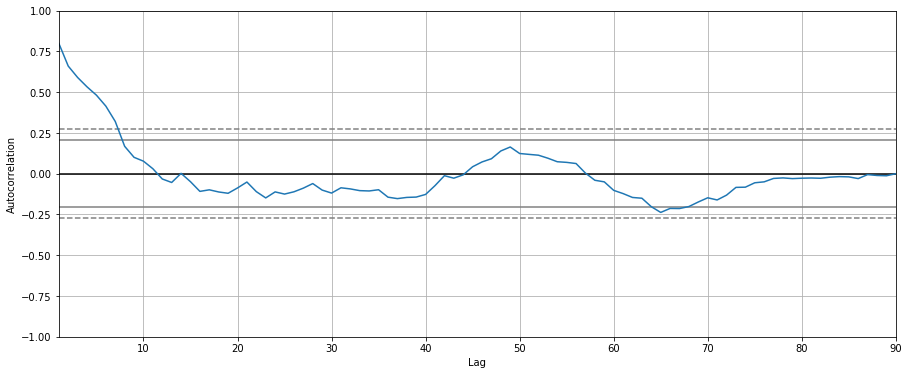

In [63]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_2016)
plt.show()

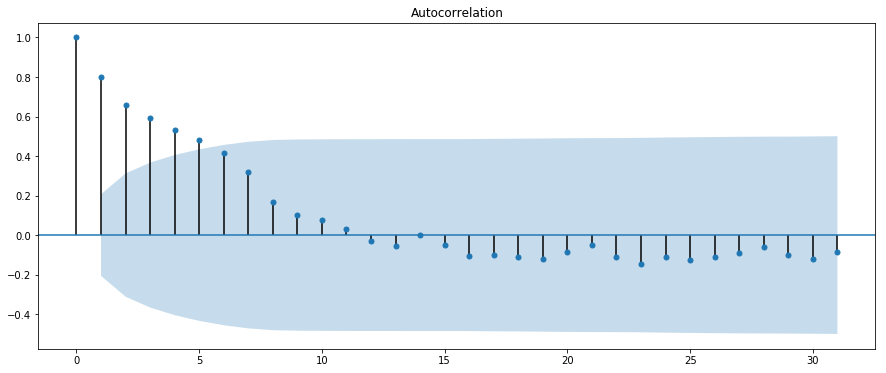

In [64]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_2016, lags=31)
plt.show()

## ARMA model  (data =only Q1 of 2015 stn =35 , prediction= march of 2016 )

In [65]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels as sm

In [66]:
dataset_2016_Q1.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4738454,2015-03-31 23:58:00,2015-04-01 00:03:00,1095,299,117,Wilton Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1994.0
1,4738450,2015-03-31 23:59:00,2015-04-01 00:15:00,537,940,43,Michigan Ave & Washington St,85,Michigan Ave & Oak St,Customer,NaN,NaN
2,4738449,2015-03-31 23:59:00,2015-04-01 00:11:00,2350,751,162,Damen Ave & Wellington Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1992.0
3,4738448,2015-03-31 23:59:00,2015-04-01 00:19:00,938,1240,51,Clark St & Randolph St,59,Wabash Ave & Roosevelt Rd,Customer,NaN,NaN
4,4738445,2015-03-31 23:54:00,2015-04-01 00:15:00,379,1292,134,Peoria St & Jackson Blvd,216,California Ave & Division St,Subscriber,Male,1976.0


In [67]:
#df_particular_Stn_16 = dataset_2016_Q1[(dataset_2016_Q1.from_station_id==35)]
#filtereddata_2016_Q2 = df_particular_Stn_16[(df_particular_Stn_16.starttime.dt.weekday_name!='Saturday') & (df_particular_Stn_16.starttime.dt.weekday_name!='Sunday')]

filtereddata_2016_Q2 = dataset_2016_Q1[(dataset_2016_Q1.starttime.dt.weekday_name!='Saturday') & (dataset_2016_Q1.starttime.dt.weekday_name!='Sunday')]
data_2016_ = pd.DataFrame(filtereddata_2016_Q2.groupby(filtereddata_2016_Q2['starttime'].dt.date).count()['trip_id'])





In [68]:
data_2016_

,trip_id
starttime,
2015-01-01,862
2015-01-02,2474
2015-01-05,1220
2015-01-06,951
2015-01-07,749
...,...
2015-03-25,3026
2015-03-26,3487
2015-03-27,2234


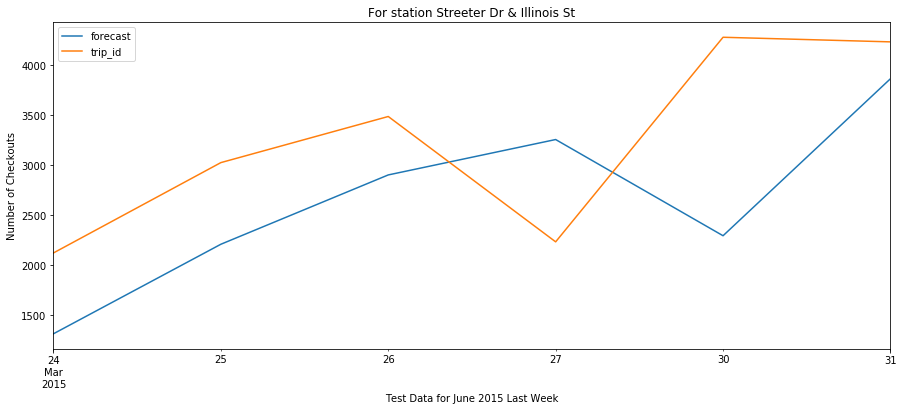

In [69]:

from statsmodels.tsa.arima_model import ARMA
md_1_AR=ARMA(data_2016_,(1,0)).fit()

md_1_AR.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


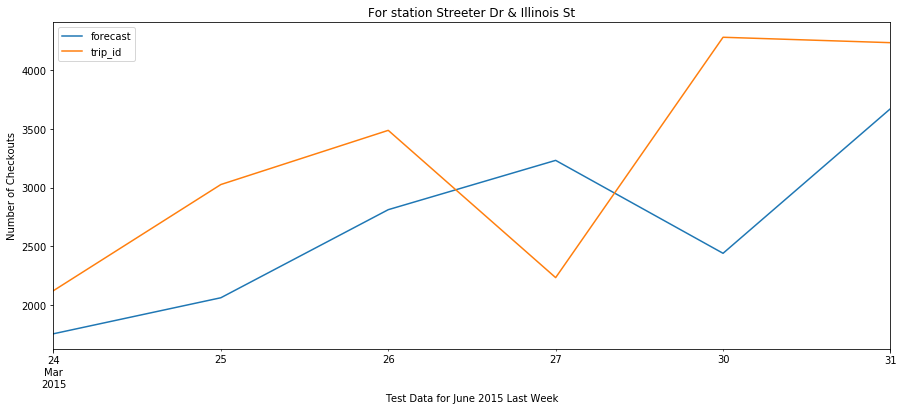

In [70]:

md_2_AR=ARMA(data_2016_,(2,0)).fit()

md_2_AR.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


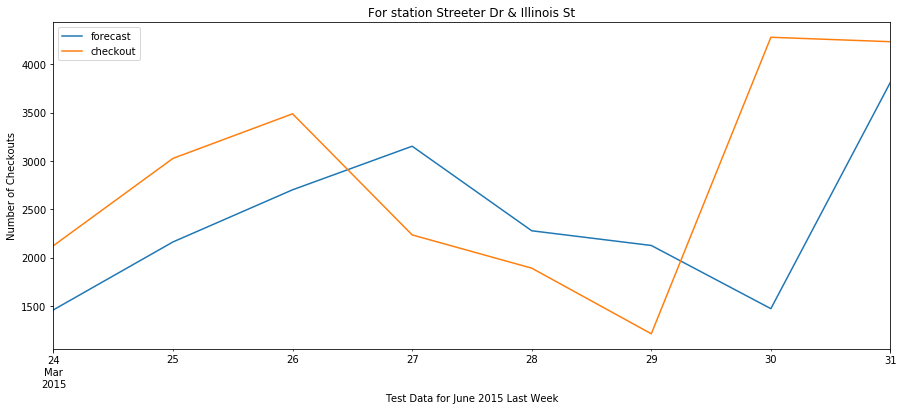

In [71]:
data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
data_2016_.columns = ['checkout']
md_3_AR=ARMA(data_2016_,(3,0)).fit()

md_3_AR.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [72]:
#md.summary()

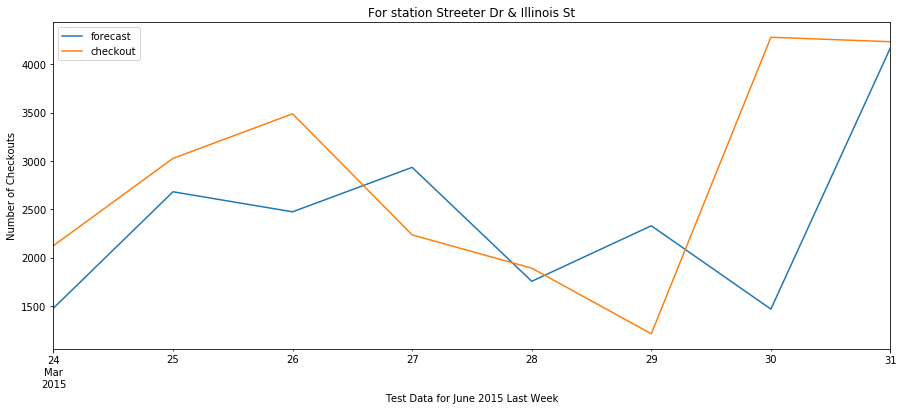

In [73]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_1_MA=ARMA(data_2016_,(0,1)).fit()

md_1_MA.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


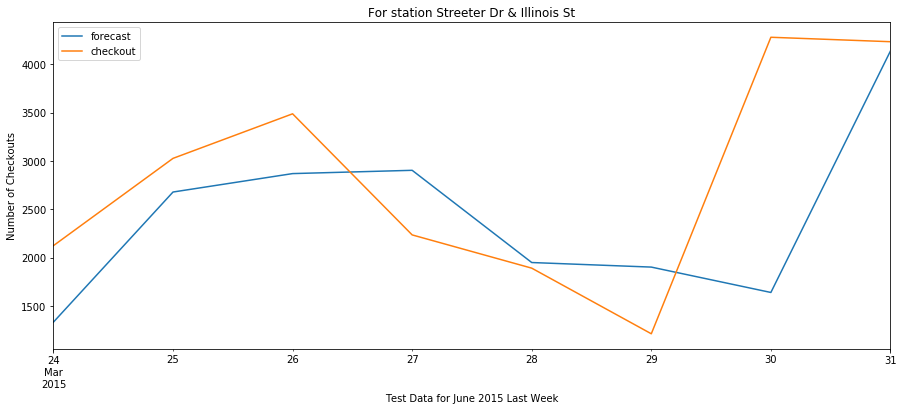

In [74]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_2_MA=ARMA(data_2016_,(0,2)).fit()

md_2_MA.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


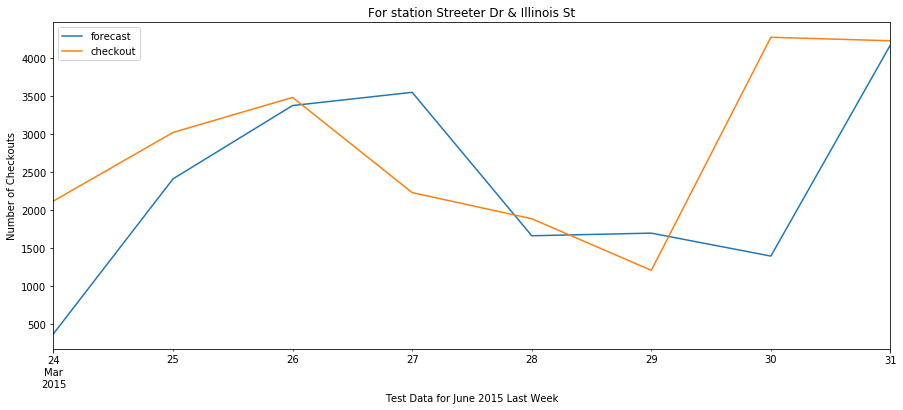

In [75]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_3_MA=ARMA(data_2016_,(0,3)).fit()

md_3_MA.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [76]:
md_1_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                trip_id   No. Observations:                   64
Model:                     ARMA(1, 0)   Log Likelihood                -532.286
Method:                       css-mle   S.D. of innovations            983.462
Date:                Mon, 02 Dec 2019   AIC                           1070.571
Time:                        14:12:21   BIC                           1077.048
Sample:                    01-01-2015   HQIC                          1073.123
                         - 03-31-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2496.5600    503.328      4.960      0.000    1510.055    3483.065
ar.L1.trip_id     0.7675      0.080      9.637      0.000       0.611       0.924
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3030           +0.0000j            1.3030            0.0000
-----------------------------------------------------------------------------
"""

In [77]:
bic=[]
md_2_AR.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                trip_id   No. Observations:                   64
Model:                     ARMA(2, 0)   Log Likelihood                -531.839
Method:                       css-mle   S.D. of innovations            976.409
Date:                Mon, 02 Dec 2019   AIC                           1071.678
Time:                        14:12:21   BIC                           1080.313
Sample:                    01-01-2015   HQIC                          1075.079
                         - 03-31-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2510.5967    557.962      4.500      0.000    1417.012    3604.182
ar.L1.trip_id     0.6751      0.125      5.388      0.000       0.430       0.921
ar.L2.trip_id     0.1199      0.126      0.949      0.346      -0.128       0.367
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2179           +0.0000j            1.2179            0.0000
AR.2           -6.8495           +0.0000j            6.8495            0.5000
-----------------------------------------------------------------------------
"""

In [78]:
md_3_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   90
Model:                     ARMA(3, 0)   Log Likelihood                -741.330
Method:                       css-mle   S.D. of innovations            908.570
Date:                Mon, 02 Dec 2019   AIC                           1492.659
Time:                        14:12:22   BIC                           1505.158
Sample:                    01-01-2015   HQIC                          1497.700
                         - 03-31-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2270.2587    560.785      4.048      0.000    1171.141    3369.377
ar.L1.checkout     0.7670      0.106      7.260      0.000       0.560       0.974
ar.L2.checkout    -0.0455      0.142     -0.321      0.749      -0.323       0.232
ar.L3.checkout     0.1187      0.114      1.041      0.301      -0.105       0.342
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1479           -0.0000j            1.1479           -0.0000
AR.2           -0.3823           -2.6824j            2.7096           -0.2725
AR.3           -0.3823           +2.6824j            2.7096            0.2725
-----------------------------------------------------------------------------
"""

In [79]:
md_1_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   90
Model:                     ARMA(0, 1)   Log Likelihood                -761.065
Method:                       css-mle   S.D. of innovations           1134.304
Date:                Mon, 02 Dec 2019   AIC                           1528.130
Time:                        14:12:22   BIC                           1535.629
Sample:                    01-01-2015   HQIC                          1531.154
                         - 03-31-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2235.0639    200.968     11.121      0.000    1841.173    2628.954
ma.L1.checkout     0.6881      0.066     10.371      0.000       0.558       0.818
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4532           +0.0000j            1.4532            0.5000
-----------------------------------------------------------------------------
"""

In [80]:
md_2_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   90
Model:                     ARMA(0, 2)   Log Likelihood                -751.846
Method:                       css-mle   S.D. of innovations           1022.836
Date:                Mon, 02 Dec 2019   AIC                           1511.693
Time:                        14:12:22   BIC                           1521.692
Sample:                    01-01-2015   HQIC                          1515.725
                         - 03-31-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2237.5484    242.093      9.243      0.000    1763.056    2712.041
ma.L1.checkout     0.8319      0.100      8.300      0.000       0.635       1.028
ma.L2.checkout     0.4311      0.086      4.995      0.000       0.262       0.600
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9649           -1.1784j            1.5230           -0.3592
MA.2           -0.9649           +1.1784j            1.5230            0.3592
-----------------------------------------------------------------------------
"""

In [81]:
md_3_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               checkout   No. Observations:                   90
Model:                     ARMA(0, 3)   Log Likelihood                -747.492
Method:                       css-mle   S.D. of innovations            972.338
Date:                Mon, 02 Dec 2019   AIC                           1504.985
Time:                        14:12:22   BIC                           1517.484
Sample:                    01-01-2015   HQIC                          1510.025
                         - 03-31-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2264.7482    283.823      7.979      0.000    1708.465    2821.031
ma.L1.checkout     0.7268      0.087      8.391      0.000       0.557       0.897
ma.L2.checkout     0.5902      0.133      4.429      0.000       0.329       0.851
ma.L3.checkout     0.4871      0.159      3.064      0.003       0.176       0.799
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2894           -0.0000j            1.2894           -0.5000
MA.2            0.0388           -1.2613j            1.2619           -0.2451
MA.3            0.0388           +1.2613j            1.2619            0.2451
-----------------------------------------------------------------------------
"""

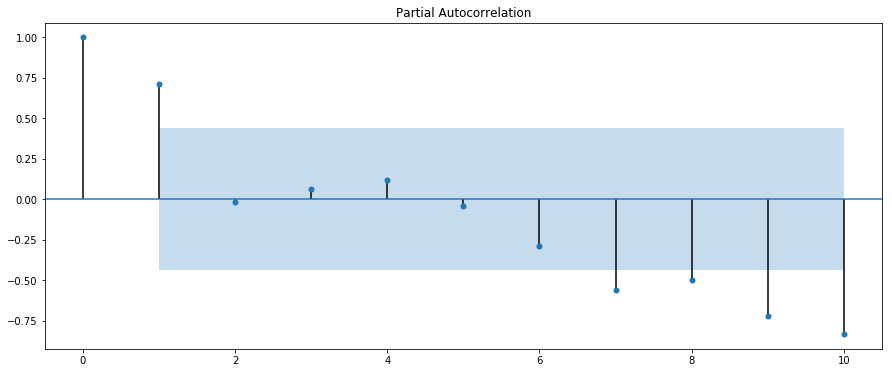

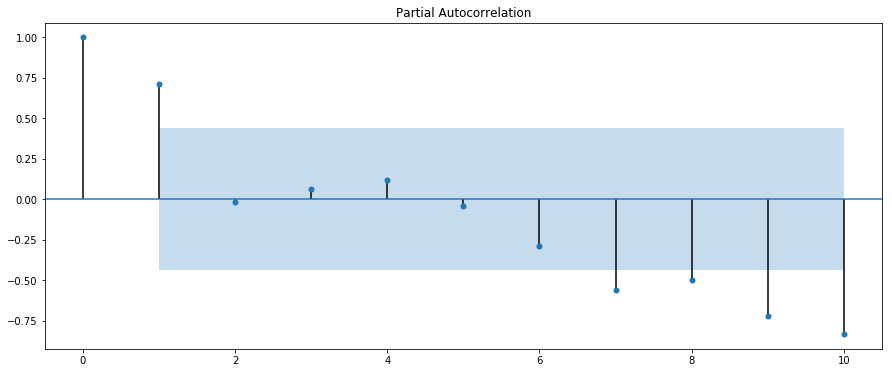

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_2016_.iloc[70:,:], lags= 10, alpha=0.05)

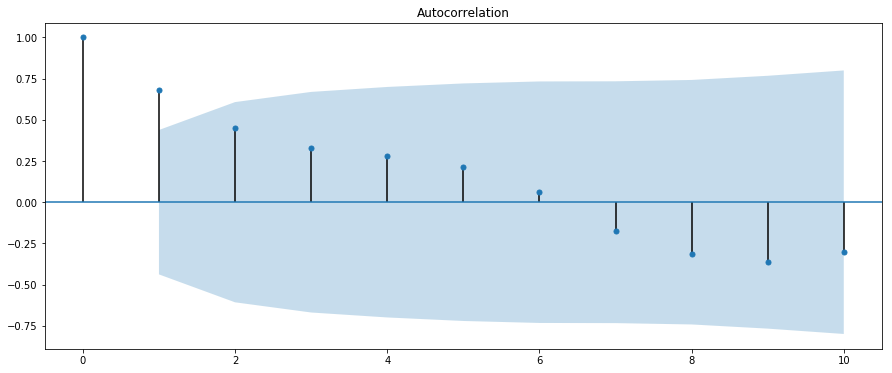

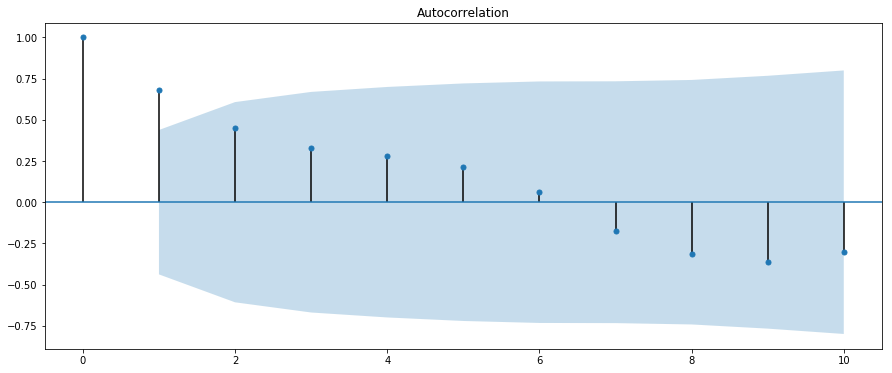

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_2016_.iloc[70:,:], lags= 10, alpha=0.05)

## ARMA 

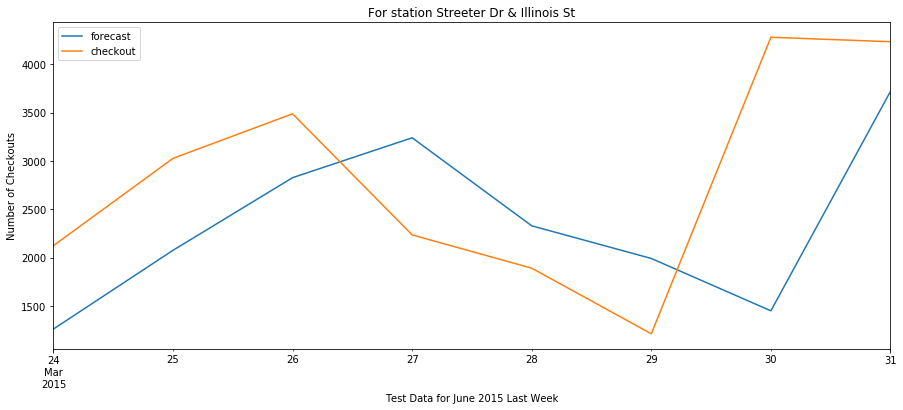

In [84]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_11=ARMA(data_2016_ ,(1,1)).fit()

md_ARMA_11.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


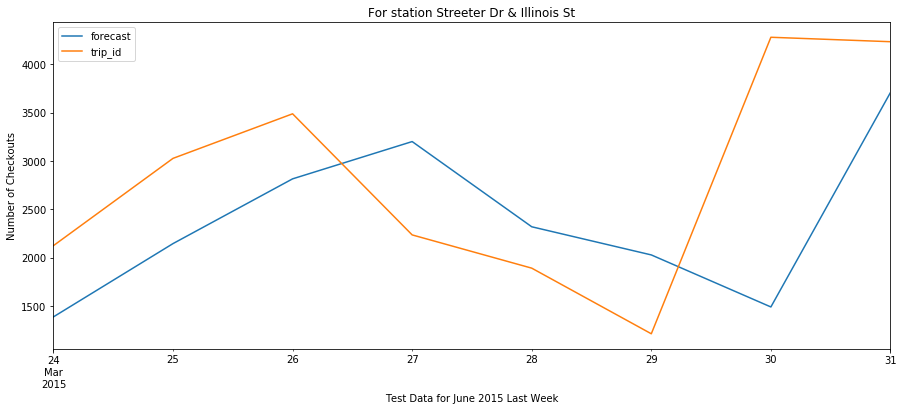

In [85]:
data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_21=ARMA(data_2016_ ,(2,1)).fit()

md_ARMA_21.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()

In [86]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
"""
md_ARMA_22=ARMA(data_2016_ ,(2,2)).fit()

md_ARMA_22.plot_predict(start='2015-03-24', end='2015-03-31')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()"""

"\nmd_ARMA_22=ARMA(data_2016_ ,(2,2)).fit()\n\nmd_ARMA_22.plot_predict(start='2015-03-24', end='2015-03-31')\nplt.xlabel('Test Data for June 2015 Last Week')\nplt.ylabel('Number of Checkouts')\nplt.title('For station Streeter Dr & Illinois St')\nplt.show()"

In [87]:
data_2016_.shape

(90, 1)

In [88]:
aic = []
aic.append(md_1_AR.aic)
aic.append(md_2_AR.aic)
aic.append(md_3_AR.aic)
aic.append(md_1_MA.aic)
aic.append(md_2_MA.aic)
aic.append(md_3_MA.aic)
aic.append(md_ARMA_11.aic)
#aic.append(md_ARMA_12.aic)
aic.append(md_ARMA_21.aic)


In [89]:
bic=[]
bic.append(md_1_AR.bic)
bic.append(md_2_AR.bic)
bic.append(md_3_AR.bic)
bic.append(md_1_MA.bic)
bic.append(md_2_MA.bic)
bic.append(md_3_MA.bic)
bic.append(md_ARMA_11.bic)
#bic.append(md_ARMA_12.bic)
bic.append(md_ARMA_21.bic)



In [90]:
aic,bic

([1070.5713953098568,
  1071.6775269081961,
  1492.6593962461197,
  1528.1298817513757,
  1511.6927968931445,
  1504.9845565793871,
  1491.6532776629124,
  1493.1393735701865],
 [1077.0480445599358,
  1080.3130592416348,
  1505.158444597771,
  1535.6293107623665,
  1521.6920355744655,
  1517.4836049310384,
  1501.6525163442334,
  1505.6384219218378])

[Text(0,0,'AR1'),
 Text(0,0,'AR2'),
 Text(0,0,'AR3'),
 Text(0,0,'MA1'),
 Text(0,0,'MA2'),
 Text(0,0,'MA3'),
 Text(0,0,'ARMA11'),
 Text(0,0,'ARMA21')]

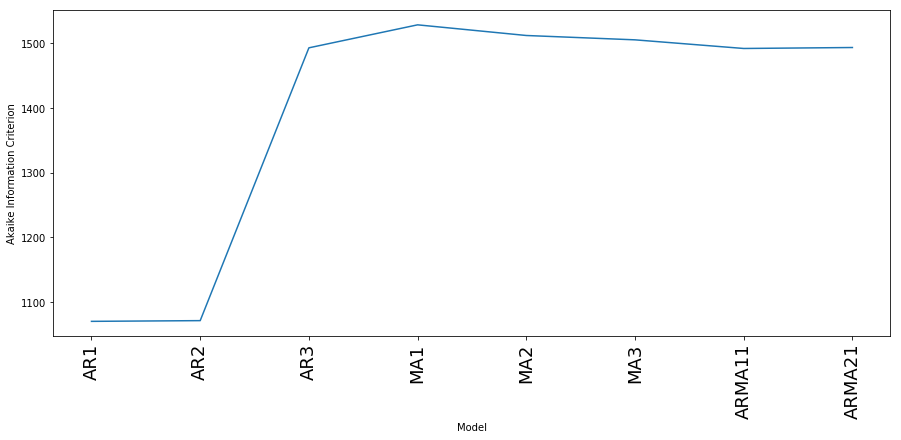

In [91]:
#xtickslabel=[AR2,AR3,MA1,MA2,MA3,ARMA11]
x = np.arange(8)
#plt.xticks(np.arange(1,20,2), ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA12','ARMA21','ARMA22'])
x_ticks_labels = ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA21']

fig, ax = plt.subplots(1,1) 
ax.plot(x,aic)
ax.set_xlabel("Model")
ax.set_ylabel("Akaike Information Criterion")
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

[Text(0,0,'AR1'),
 Text(0,0,'AR2'),
 Text(0,0,'AR3'),
 Text(0,0,'MA1'),
 Text(0,0,'MA2'),
 Text(0,0,'MA3'),
 Text(0,0,'ARMA11'),
 Text(0,0,'ARMA21')]

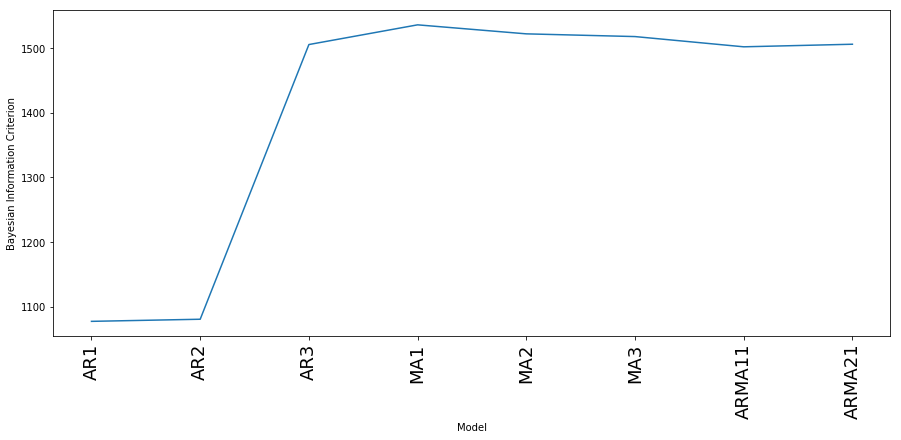

In [92]:
#xtickslabel=[AR2,AR3,MA1,MA2,MA3,ARMA11]
x = np.arange(8)
#plt.xticks(np.arange(1,20,2), ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA12','ARMA21','ARMA22'])
x_ticks_labels = ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA21']

fig, ax = plt.subplots(1,1) 
ax.plot(x,bic)
ax.set_xlabel("Model")
ax.set_ylabel("Bayesian Information Criterion")
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)


In [93]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def modelARIMA(train,test,p,q,d):
    model = ARIMA(train, order=(p,q,d))  
    
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(test.shape[0], alpha=0.3)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc,fc_series
def auto_arima(df):
    smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)



    print(smodel.summary())
    return smodel

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Create Training and Test
train = data_2016_[:60]
test = data_2016_[60:]
fc,fc_series = modelARIMA(train,test,2,1,1)
auto_arima(data_2016_)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))

In [ ]:
data_2016_.head()